In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

# Reading the data, calculating the interview durations

In [2]:
# Reading in the dataset and selecting the columns related to interview date & time
time = pd.read_csv('main.csv', usecols = ['HHID','Date_HH_Visit', 'DATE_INTERVIEW','START_TIME','TIME_END_VISIT1'])
time.head()

,HHID,Date_HH_Visit,DATE_INTERVIEW,START_TIME,TIME_END_VISIT1
0,110148801,2017-11-11,2017-11-11,2017-11-11T01:22:15Z,2017-11-11T02:49:33Z
1,110148802,2017-11-11,2017-11-11,2017-06-11T02:37:45Z,2017-11-11T04:04:27Z
2,110148803,2017-11-11,2017-11-11,2017-11-11T03:23:40Z,2017-11-11T04:47:09Z
3,110148804,2017-11-11,2017-11-11,2017-11-11T04:24:47Z,2017-11-11T05:41:59Z
4,110148805,2017-11-11,2017-11-11,2017-11-11T05:56:16Z,2017-11-11T07:00:32Z


In [3]:
def parse_date(date):
    """
    Converts the date into YYYY-MM-DD HH:MM:SS if the date is a valid date, else NaN
    """
    try:
        return parse(date)
    except:
        return np.nan

In [4]:
time['start_time'] = time['START_TIME'].apply(lambda x: parse_date(x))
time['end_time'] = time['TIME_END_VISIT1'].apply(lambda x: parse_date(x))
time['interview_date'] = time['DATE_INTERVIEW'].apply(lambda x: parse_date(x))

In [5]:
# Checking whether there is an invalid datetime
time.isna().sum()

HHID               0
Date_HH_Visit      0
DATE_INTERVIEW     0
START_TIME         0
TIME_END_VISIT1    0
start_time         0
end_time           1
interview_date     0
dtype: int64

> One record has an invalid End date (time)

In [6]:
#Removing the errornous record
time.dropna(inplace = True)

In [7]:
# Adding the Day, Month and Year of the interview
time['day'] = time['interview_date'].apply(lambda x: x.day)
time['month'] = time['interview_date'].apply(lambda x: x.month)
time['year'] = time['interview_date'].apply(lambda x: x.year)

In [8]:
#Calculating the duration
time['duration'] = time['end_time'] - time['start_time']

In [9]:
time

,HHID,Date_HH_Visit,DATE_INTERVIEW,START_TIME,TIME_END_VISIT1,start_time,end_time,interview_date,day,month,year,duration
0,110148801,2017-11-11,2017-11-11,2017-11-11T01:22:15Z,2017-11-11T02:49:33Z,2017-11-11 01:22:15+00:00,2017-11-11 02:49:33+00:00,2017-11-11,11,11,2017,0 days 01:27:18
1,110148802,2017-11-11,2017-11-11,2017-06-11T02:37:45Z,2017-11-11T04:04:27Z,2017-06-11 02:37:45+00:00,2017-11-11 04:04:27+00:00,2017-11-11,11,11,2017,153 days 01:26:42
2,110148803,2017-11-11,2017-11-11,2017-11-11T03:23:40Z,2017-11-11T04:47:09Z,2017-11-11 03:23:40+00:00,2017-11-11 04:47:09+00:00,2017-11-11,11,11,2017,0 days 01:23:29
3,110148804,2017-11-11,2017-11-11,2017-11-11T04:24:47Z,2017-11-11T05:41:59Z,2017-11-11 04:24:47+00:00,2017-11-11 05:41:59+00:00,2017-11-11,11,11,2017,0 days 01:17:12
4,110148805,2017-11-11,2017-11-11,2017-11-11T05:56:16Z,2017-11-11T07:00:32Z,2017-11-11 05:56:16+00:00,2017-11-11 07:00:32+00:00,2017-11-11,11,11,2017,0 days 01:04:16
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,432714011,2017-09-14,2017-09-14,2017-09-14T05:33:09Z,2017-09-14T06:54:08Z,2017-09-14 05:33:09+00:00,2017-09-14 06:54:08+00:00,2017-09-14,14,9,2017,0 days 01:20:59
5996,432714012,2017-09-14,2017-09-14,2017-09-14T07:02:09Z,2017-09-14T08:23:09Z,2017-09-14 07:02:09+00:00,2017-09-14 08:23:09+00:00,2017-09-14,14,9,2017,0 days 01:21:00
5997,432714013,2017-09-14,2017-09-14,2017-09-14T09:07:50Z,2017-09-14T10:33:06Z,2017-09-14 09:07:50+00:00,2017-09-14 10:33:06+00:00,2017-09-14,14,9,2017,0 days 01:25:16
5998,432714014,2017-09-15,2017-09-15,2017-09-15T07:11:35Z,2017-09-15T08:39:54Z,2017-09-15 07:11:35+00:00,2017-09-15 08:39:54+00:00,2017-09-15,15,9,2017,0 days 01:28:19


> The second record has an error (I bet an interview can't go beyond/belowa day)

# Removing all interviews that went beyond/below a day

In [10]:
bad_records = time[~time['duration'].astype(str).str.startswith('0')]
bad_records

,HHID,Date_HH_Visit,DATE_INTERVIEW,START_TIME,TIME_END_VISIT1,start_time,end_time,interview_date,day,month,year,duration
1,110148802,2017-11-11,2017-11-11,2017-06-11T02:37:45Z,2017-11-11T04:04:27Z,2017-06-11 02:37:45+00:00,2017-11-11 04:04:27+00:00,2017-11-11,11,11,2017,153 days 01:26:42
36,110149007,2017-08-08,2017-08-08,2017-08-08T05:42:34Z,2017-08-09T07:25:16Z,2017-08-08 05:42:34+00:00,2017-08-09 07:25:16+00:00,2017-08-08,8,8,2017,1 days 01:42:42
39,110149010,2017-08-09,2017-08-09,2017-08-09T06:17:01Z,2017-08-08T09:29:52Z,2017-08-09 06:17:01+00:00,2017-08-08 09:29:52+00:00,2017-08-09,9,8,2017,-1 days +03:12:51
42,110149013,2017-08-08,2017-08-08,2017-08-08T08:15:40Z,2017-08-07T22:27:16Z,2017-08-08 08:15:40+00:00,2017-08-07 22:27:16+00:00,2017-08-08,8,8,2017,-1 days +14:11:36
61,110149202,2017-08-13,2017-08-13,2017-08-13T07:46:23Z,2017-08-12T06:54:01Z,2017-08-13 07:46:23+00:00,2017-08-12 06:54:01+00:00,2017-08-13,13,8,2017,-2 days +23:07:38
...,...,...,...,...,...,...,...,...,...,...,...,...
5870,432713206,2017-07-27,2017-07-27,2017-07-27T08:22:37Z,2017-07-28T13:21:55Z,2017-07-27 08:22:37+00:00,2017-07-28 13:21:55+00:00,2017-07-27,27,7,2017,1 days 04:59:18
5871,432713207,2017-07-29,2017-07-29,2017-08-11T07:58:08Z,2017-07-29T09:59:18Z,2017-08-11 07:58:08+00:00,2017-07-29 09:59:18+00:00,2017-07-29,29,7,2017,-13 days +02:01:10
5873,432713209,2017-07-29,2017-07-29,2017-07-29T16:08:38Z,2017-08-01T12:12:11Z,2017-07-29 16:08:38+00:00,2017-08-01 12:12:11+00:00,2017-07-29,29,7,2017,2 days 20:03:33
5944,432713705,2017-07-29,2017-07-29,2017-07-28T01:50:07Z,2017-07-29T03:31:12Z,2017-07-28 01:50:07+00:00,2017-07-29 03:31:12+00:00,2017-07-29,29,7,2017,1 days 01:41:05


> 126 records has an error in start or end state.

In [11]:
good_records = time[time['duration'].astype(str).str.startswith('0')]
good_records

,HHID,Date_HH_Visit,DATE_INTERVIEW,START_TIME,TIME_END_VISIT1,start_time,end_time,interview_date,day,month,year,duration
0,110148801,2017-11-11,2017-11-11,2017-11-11T01:22:15Z,2017-11-11T02:49:33Z,2017-11-11 01:22:15+00:00,2017-11-11 02:49:33+00:00,2017-11-11,11,11,2017,0 days 01:27:18
2,110148803,2017-11-11,2017-11-11,2017-11-11T03:23:40Z,2017-11-11T04:47:09Z,2017-11-11 03:23:40+00:00,2017-11-11 04:47:09+00:00,2017-11-11,11,11,2017,0 days 01:23:29
3,110148804,2017-11-11,2017-11-11,2017-11-11T04:24:47Z,2017-11-11T05:41:59Z,2017-11-11 04:24:47+00:00,2017-11-11 05:41:59+00:00,2017-11-11,11,11,2017,0 days 01:17:12
4,110148805,2017-11-11,2017-11-11,2017-11-11T05:56:16Z,2017-11-11T07:00:32Z,2017-11-11 05:56:16+00:00,2017-11-11 07:00:32+00:00,2017-11-11,11,11,2017,0 days 01:04:16
5,110148806,2017-11-11,2017-11-11,2017-11-11T05:41:32Z,2017-11-11T07:00:03Z,2017-11-11 05:41:32+00:00,2017-11-11 07:00:03+00:00,2017-11-11,11,11,2017,0 days 01:18:31
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,432714011,2017-09-14,2017-09-14,2017-09-14T05:33:09Z,2017-09-14T06:54:08Z,2017-09-14 05:33:09+00:00,2017-09-14 06:54:08+00:00,2017-09-14,14,9,2017,0 days 01:20:59
5996,432714012,2017-09-14,2017-09-14,2017-09-14T07:02:09Z,2017-09-14T08:23:09Z,2017-09-14 07:02:09+00:00,2017-09-14 08:23:09+00:00,2017-09-14,14,9,2017,0 days 01:21:00
5997,432714013,2017-09-14,2017-09-14,2017-09-14T09:07:50Z,2017-09-14T10:33:06Z,2017-09-14 09:07:50+00:00,2017-09-14 10:33:06+00:00,2017-09-14,14,9,2017,0 days 01:25:16
5998,432714014,2017-09-15,2017-09-15,2017-09-15T07:11:35Z,2017-09-15T08:39:54Z,2017-09-15 07:11:35+00:00,2017-09-15 08:39:54+00:00,2017-09-15,15,9,2017,0 days 01:28:19


# Durations Analysis

## Summary Statistics

In [12]:
key_statistics = good_records['duration'].describe().to_frame()
key_statistics.columns = ['Value']
key_statistics

,Value
count,5873
mean,0 days 01:59:33.213860037
std,0 days 01:24:16.285962196
min,0 days 00:00:17
25%,0 days 01:35:03
50%,0 days 01:51:52
75%,0 days 02:07:00
max,0 days 22:25:14


> 25% to 75% of the interviews took between 1h35min and 2h07min

In [13]:
print('Unique Values: ',len(good_records['duration'].unique()))

Unique Values:  3306


> In 5873 records with duration less than a day, we have 3306 unique durations. This means that several interviews have similar duration.

## Top durations

In [14]:
good_records['duration'].value_counts(bins=100, normalize =True).head().sort_index()*100

(0 days 01:20:58.820000, 0 days 01:34:25.790000]    14.949770
(0 days 01:34:25.790000, 0 days 01:47:52.760000]    18.763834
(0 days 01:47:52.760000, 0 days 02:01:19.730000]    21.862762
(0 days 02:01:19.730000, 0 days 02:14:46.700000]    20.824110
(0 days 02:14:46.700000, 0 days 02:28:13.670000]     7.594075
Name: duration, dtype: float64

> Around 83% of the interviews took between 01h20 and 02h28

In [15]:
good_records['duration'].value_counts().head(100).sort_index()

0 days 01:24:59     7
0 days 01:25:00     6
0 days 01:26:00     6
0 days 01:30:59     6
0 days 01:31:00    10
                   ..
0 days 02:12:59     8
0 days 02:13:00    10
0 days 02:14:00    11
0 days 02:14:59     6
0 days 02:15:00     9
Name: duration, Length: 100, dtype: int64

> 825 Records in top 100 durations range between 1h24min and 2h:15min.

## Daily Interviews

In [16]:
daily = good_records.groupby(['year','month','day'], as_index = False).size()

In [17]:
daily

,year,month,day,size
0,2015,7,29,1
1,2017,7,26,3
2,2017,7,27,52
3,2017,7,28,106
4,2017,7,29,99
...,...,...,...,...
90,2017,11,19,10
91,2017,11,20,7
92,2017,11,22,5
93,2017,11,23,5


> 1 record is probably errornous (year = 2015)

In [18]:
daily = daily[daily['year'] != 2015]

In [19]:
def range_interviews(number, interval = 5):
    """
    Return the boundary of interviews conducted on a specific day, default interval of 5
    """
    
    upper_range = number + (interval - number) % interval    
    lower_range = upper_range - interval
    
    return f'{lower_range} - {upper_range}'

In [20]:
daily['n_interviews'] = daily['size'].apply(lambda x: range_interviews(x))

In [21]:
daily_statistics = daily['n_interviews'].value_counts().to_frame().reset_index()
daily_statistics.columns = ['n_interviews','n_days']
daily_statistics = daily_statistics[['n_days','n_interviews']]
daily_statistics

,n_days,n_interviews
0,13,5 - 10
1,11,0 - 5
2,7,95 - 100
3,7,85 - 90
4,7,100 - 105
5,5,105 - 110
6,5,90 - 95
7,5,15 - 20
8,4,110 - 115
9,3,80 - 85


In [22]:
daily_statistics['key'] = daily_statistics['n_interviews'].apply(lambda x: int(x.split(' - ')[1]))
daily_statistics.sort_values(by='key', inplace = True)

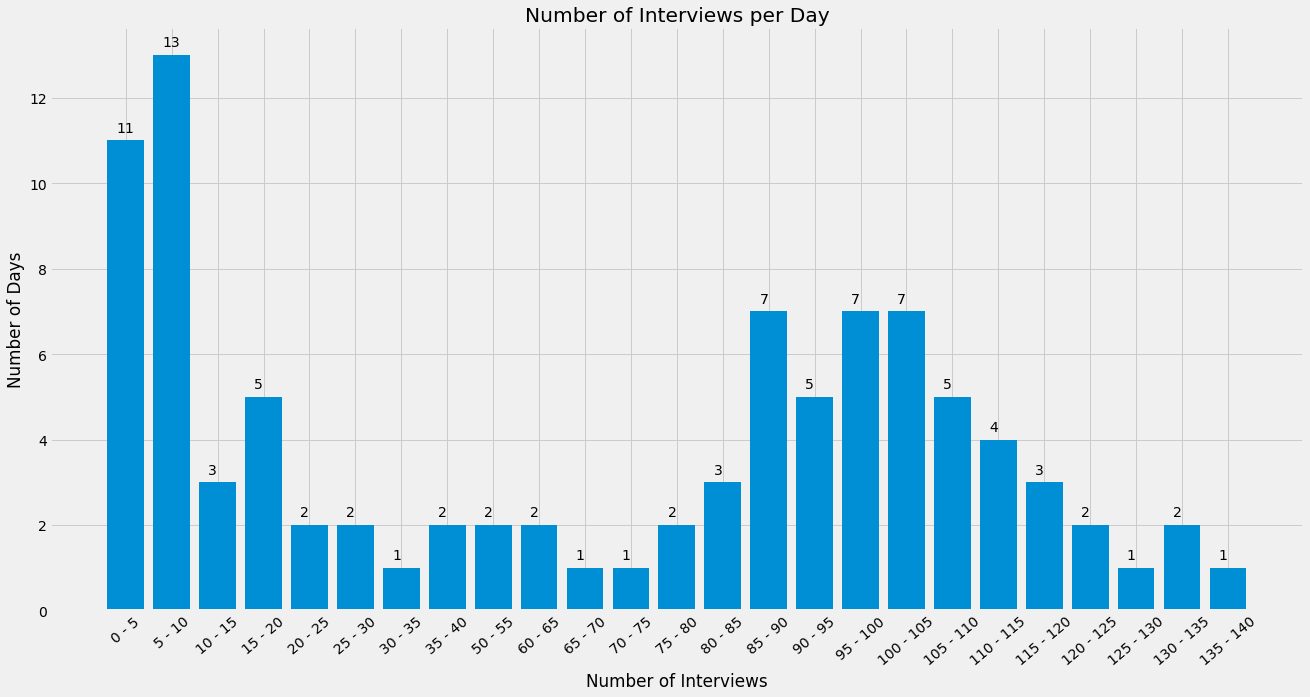

In [23]:
#Ploting
plt.figure(figsize=(20,10))
plt.bar(daily_statistics['n_interviews'], daily_statistics['n_days'])
plt.title('Number of Interviews per Day')
plt.xticks(rotation=40);
plt.xlabel('Number of Interviews')
plt.ylabel('Number of Days')
for i, value in enumerate(daily_statistics['n_days']):
    plt.text(i-0.2,value+0.2, value)

> - 6 days recorded between 120 and 140 interviews/day
> - 26 days recorded 85 to 105 interviews/day
> - 24 days interviews recorded up to 10 interviews/day

# Monthly Interviews

In [24]:
monthly = daily[['month','size']].groupby(['month'],as_index=False).sum()
monthly.columns = ['month', 'n_interviews']

In [25]:
monthly

,month,n_interviews
0,7,339
1,8,2852
2,9,2409
3,10,109
4,11,163


> The survey was conducted in July to November. Most interviews were conducted in August and September

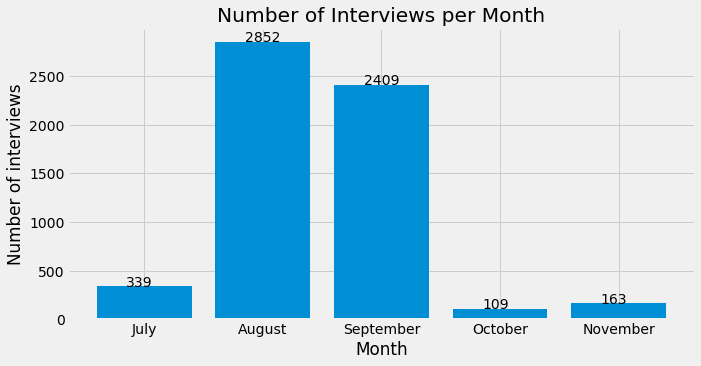

In [26]:
#Ploting
plt.figure(figsize=(10,5))
plt.bar(monthly.index, monthly['n_interviews']);
plt.title('Number of Interviews per Month')
plt.xticks(monthly.index, ['July','August','September','October','November'])
#plt.xticks(rotation=40);
plt.xlabel('Month')
plt.ylabel('Number of interviews')
for i, value in enumerate(monthly['n_interviews']):
    plt.text(i-0.15,value+1, value)